<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:40px 20px;"><b>Decision Tree Classification - Penguins Dataset</b></p>

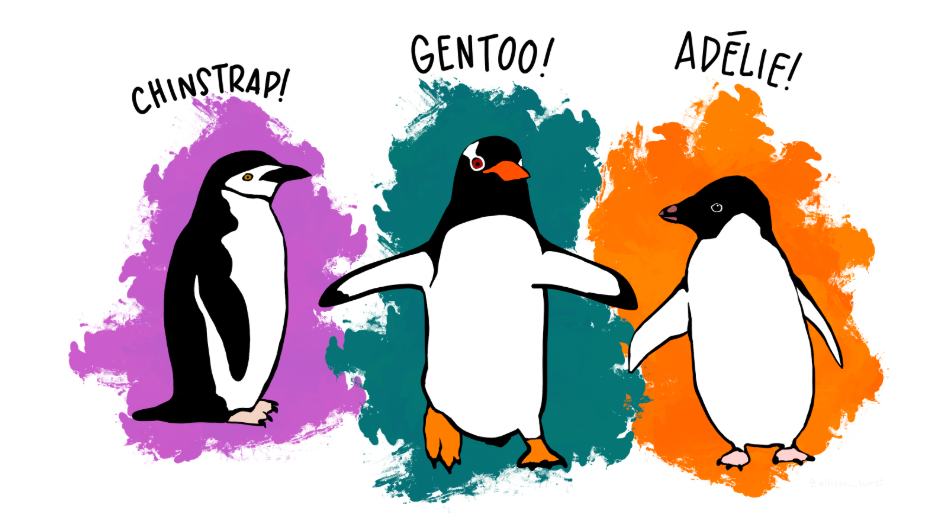

# <font color='steelblue'> <b>Importing Libraries</b><font color='black'>  

In [4]:
# pip install cufflinks

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf  
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, make_scorer, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# <font color='steelblue'> <b>Loading The Dataset & EDA</b><font color='black'>  

In [7]:
df0 = pd.read_csv("penguins_size.csv")
df = df0.copy()

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


- The Palmer Archipelago (Antarctica) Penguins dataset contains data on three different species of penguins (Adelie, Chinstrap, and Gentoo) found in Antarctica's Palmer Archipelago.

- This dataset is quite popular for various research and educational uses, particularly for teaching and testing data analysis, statistical models, and machine learning algorithms.

- The dataset includes morphological measurements of the penguins; these measurements include the length and depth of their beaks, flipper (wing) length, and body weight. Additionally, information such as the penguin's species, island, and sex is provided for each observation.

- The Penguins dataset is a popular resource among data science and machine learning communities for both educational and research purposes. Moreover, this dataset is frequently used alongside the seaborn library.

- It is a sufficiently simple dataset to understand how classification results can change by tweaking hyperparameters.

- The data were collected and made available by Dr. Kristen Gorman and her team, members of the Antarctic Long-Term Ecological Research Network (LTER).

- **species**: Indicates the species of the penguin. Unique values: Adelie, Chinstrap, Gentoo.

- **island**: The island where the penguin was observed. Unique values: Biscoe, Dream, Torgersen.

- **culmen_length_mm**: The length of the penguin's culmen (in millimeters).

- **culmen_depth_mm**: The depth of the penguin's culmen (in millimeters).

- **flipper_length_mm**: The length of the penguin's flipper (in millimeters).

- **body_mass_g**: The body weight of the penguin (in grams).

- **sex**: The sex of the penguin.

**The goal is to create a model that can predict a penguin's species based on physical characteristics, thus aiding researchers in classifying penguins in the field without the need for an experienced biologist.**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [11]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [18]:
10/344

# Since missing values ​​correspond to 3% of the data, we can drop them.

0.029069767441860465

In [20]:
df = df.dropna()
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [22]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include='number').columns

In [24]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""
    
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

unique_values(df, cat_features)

Column: species
------------------------------
Unique Values (3): ['Adelie' 'Chinstrap' 'Gentoo']

Value Counts:
species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

Column: island
------------------------------
Unique Values (3): ['Torgersen' 'Biscoe' 'Dream']

Value Counts:
island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64

Column: sex
------------------------------
Unique Values (3): ['MALE' 'FEMALE' '.']

Value Counts:
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64



There is a value "." in sex columns. Let's check this value.

In [26]:
df[df["sex"]=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [28]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

When we look at the table above, we can think that the value filled with "." is closer to the "Male" values. So let's change this value to "Male".

In [30]:
df.loc[336, "sex"] = "MALE"

In [32]:
df.loc[336, "sex"]

'MALE'

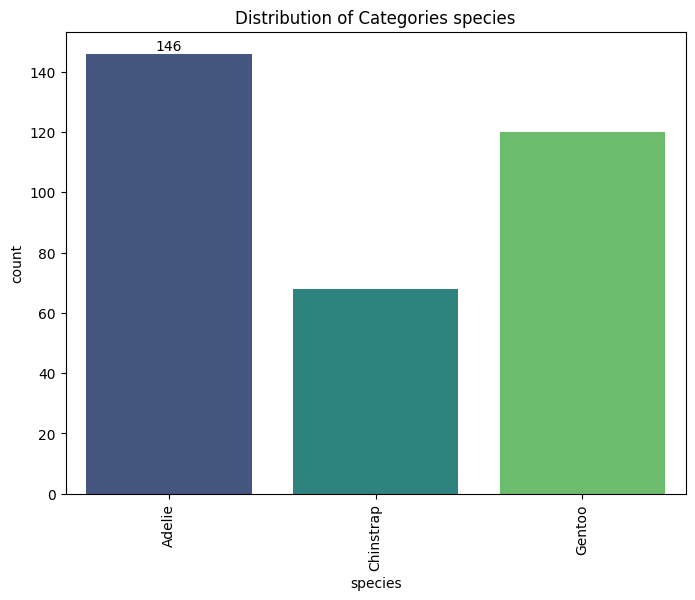

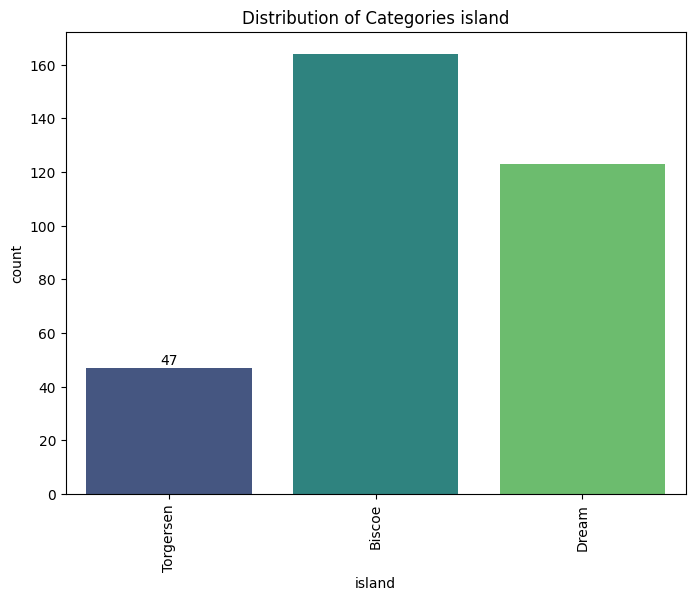

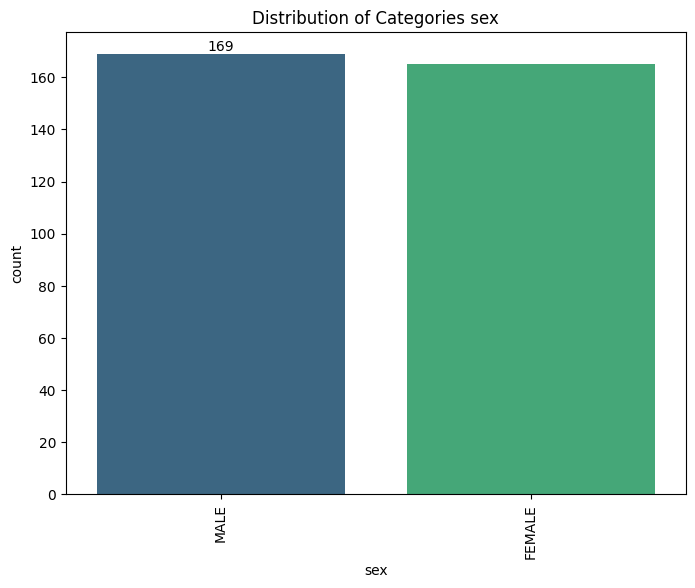

In [34]:
# To show the distribution of categorical features;

for column in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')
    
    ax.bar_label(ax.containers[0])
    
    plt.xticks(rotation=90)
    plt.show()

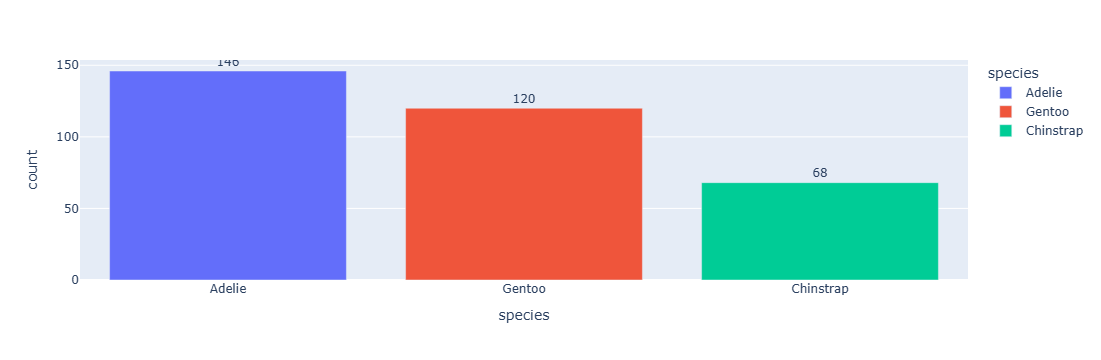

In [36]:
species_count = df['species'].value_counts().reset_index()
species_count.columns = ['species', 'count']

fig = px.bar(species_count, x='species', y='count', text='count', color='species')

fig.update_traces(texttemplate='%{text}', textposition='outside')

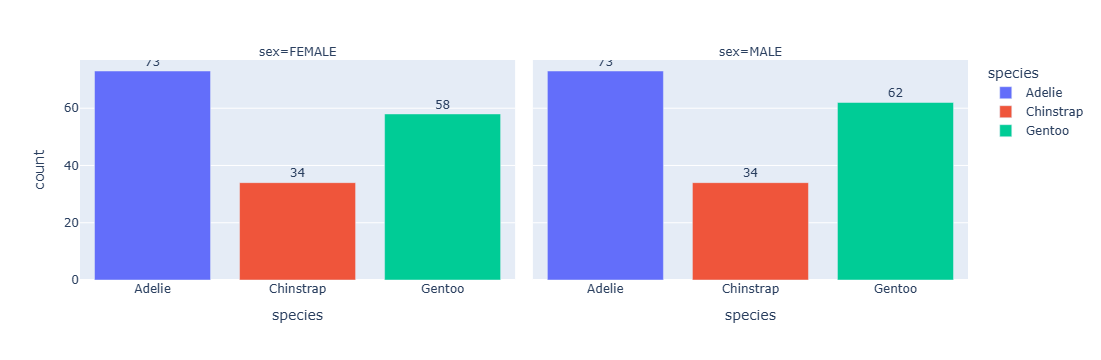

In [38]:
species_sex_count = df.groupby(['species', 'sex']).size().reset_index(name='count')

fig = px.bar(species_sex_count, x='species', y='count', color='species', facet_col='sex', text='count')

fig.update_traces(texttemplate='%{text}', textposition='outside')

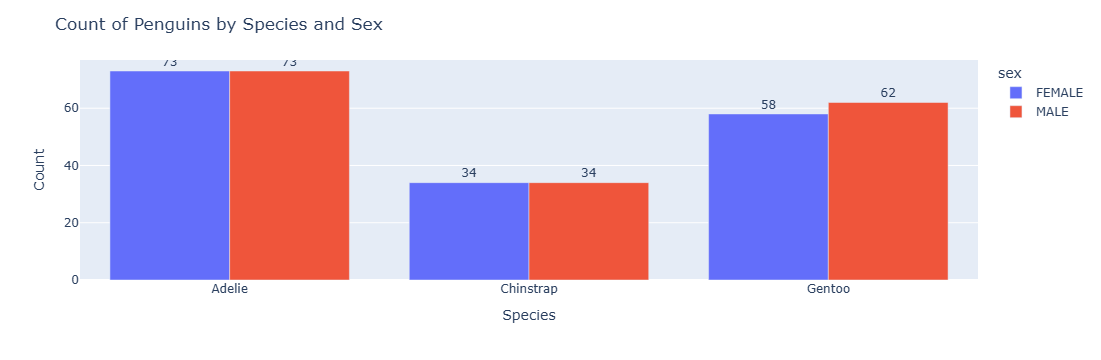

In [40]:
species_sex_count = df.groupby(['species', 'sex']).size().reset_index(name='count')

fig = px.bar(species_sex_count, x='species', y='count', color='sex', text='count', barmode='group')
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    xaxis_title='Species',
    yaxis_title='Count',
    title='Count of Penguins by Species and Sex'
)

fig.show()

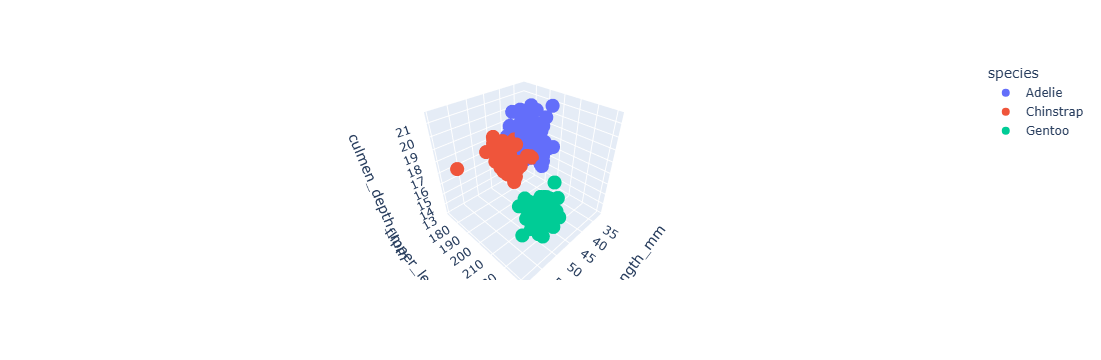

In [42]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

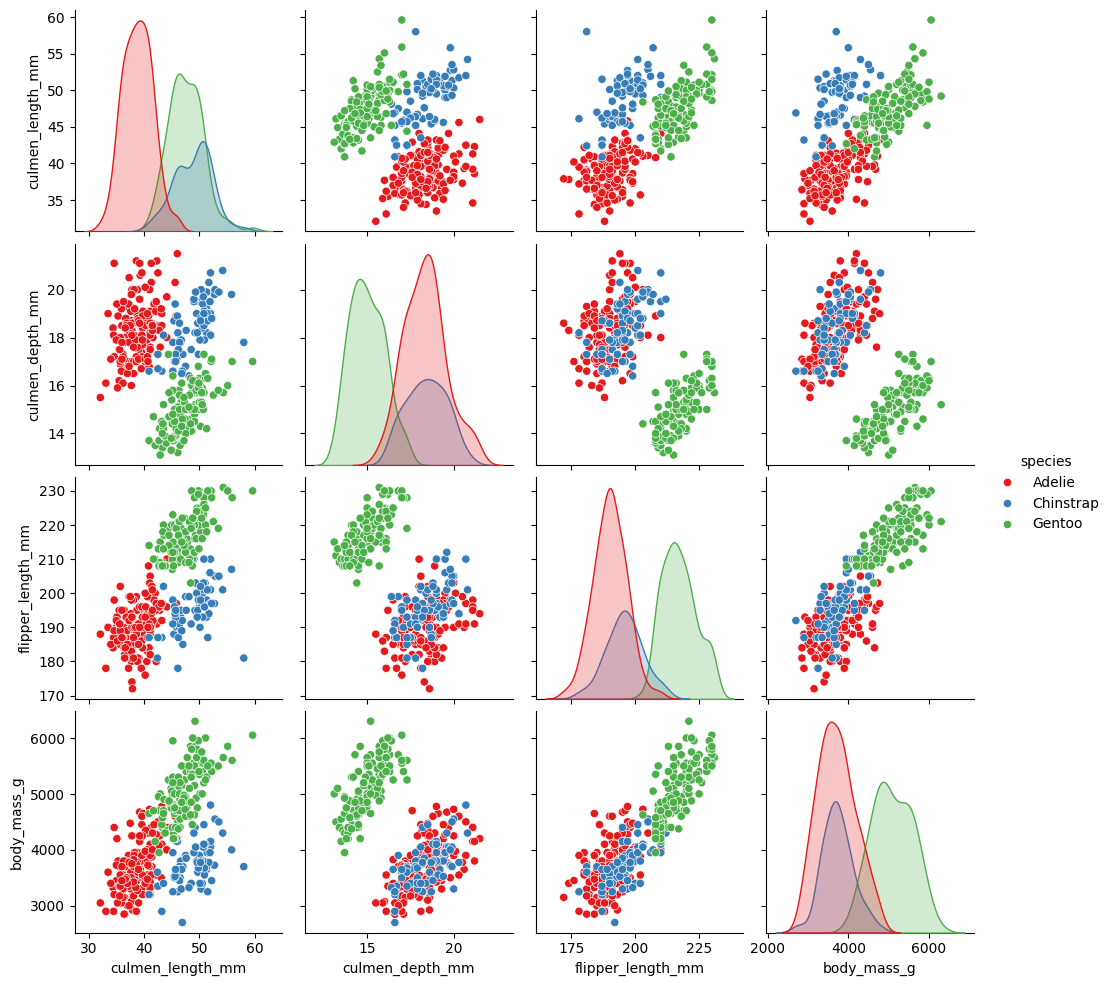

In [44]:
sns.pairplot(df, hue="species", palette="Set1");

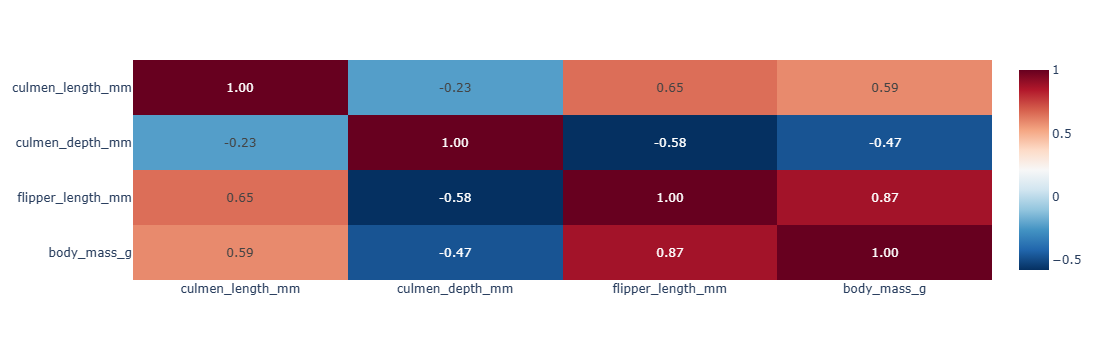

In [46]:
import plotly.express as px

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

fig = px.imshow(corr_matrix, text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

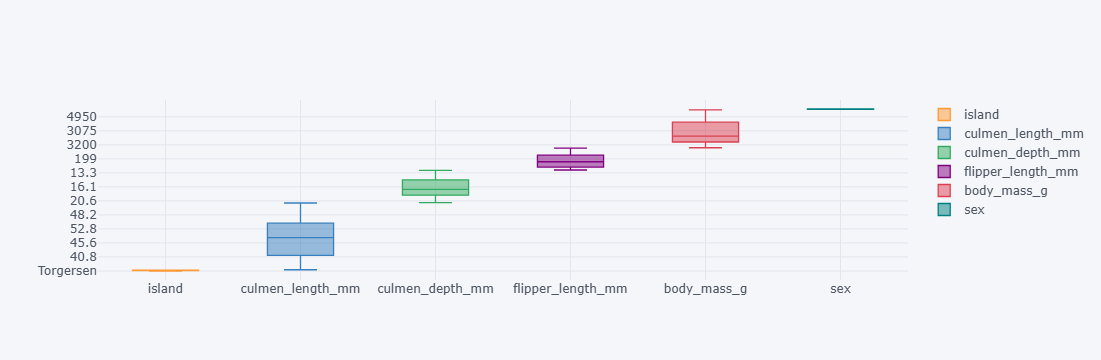

In [48]:
cf.go_offline()
df.iloc[:,1:].iplot(kind="box")

# <font color='steelblue'> <b>Modelling</b><font color='black'>  

## <font color='skyblue'> <b>Train | Test Split</b><font color='black'>  

In [50]:
X = df.drop('species',axis=1)
y = df['species']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [54]:
cat = X_train.select_dtypes("object").columns
cat

Index(['island', 'sex'], dtype='object')

In [56]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 
column_trans = make_column_transformer((ord_enc, cat),
                                       remainder='passthrough')

## <font color='skyblue'> <b>Vanilla Model & Model Performance</b><font color='black'>  

In [62]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

In [64]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



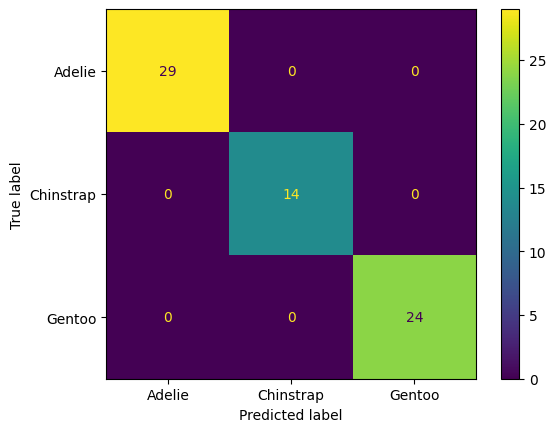

In [66]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

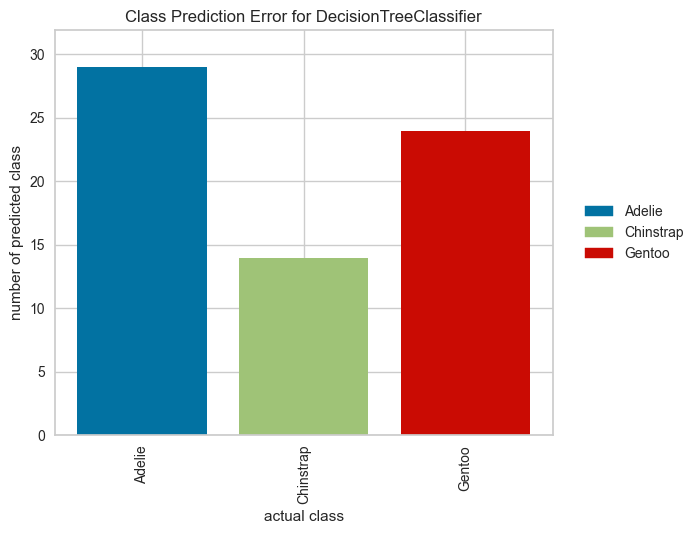

In [68]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(pipe_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

# ClassPredictionError function shows errors made on a class basis.

**If there were errors as predict, the ClassPredictionError graph would look like this.**
- For class_0, different values ​​in that bar indicate the errors made. For example, in the image below, some values ​​in class_0 are estimated as class_1.

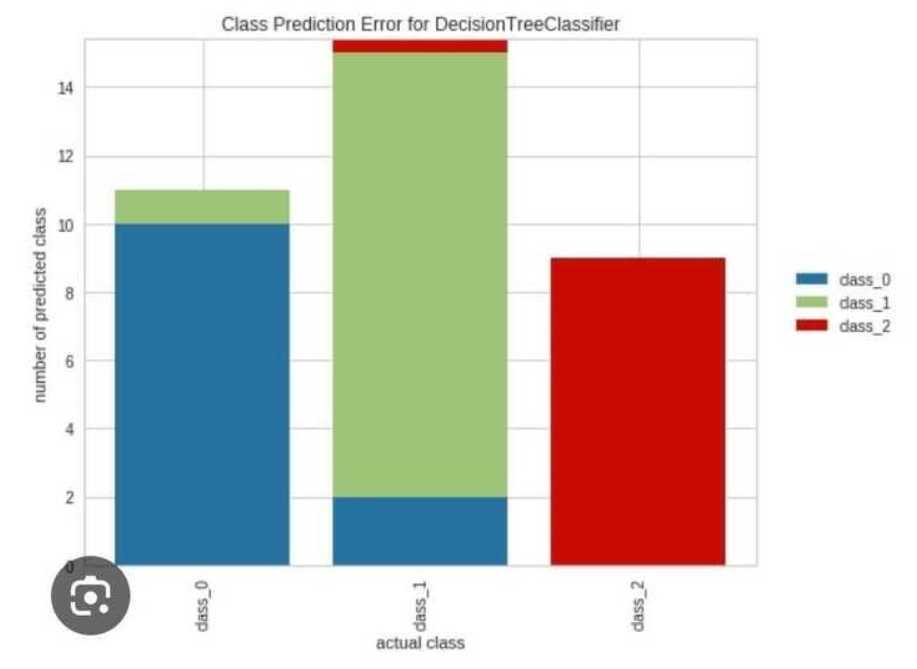

## <font color='skyblue'> <b>Cross Validation</b><font color='black'>  

In [71]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.973789
train_accuracy           1.000000
test_precision_micro     0.973789
train_precision_micro    1.000000
test_recall_micro        0.973789
train_recall_micro       1.000000
test_f1_micro            0.973789
train_f1_micro           1.000000
dtype: float64

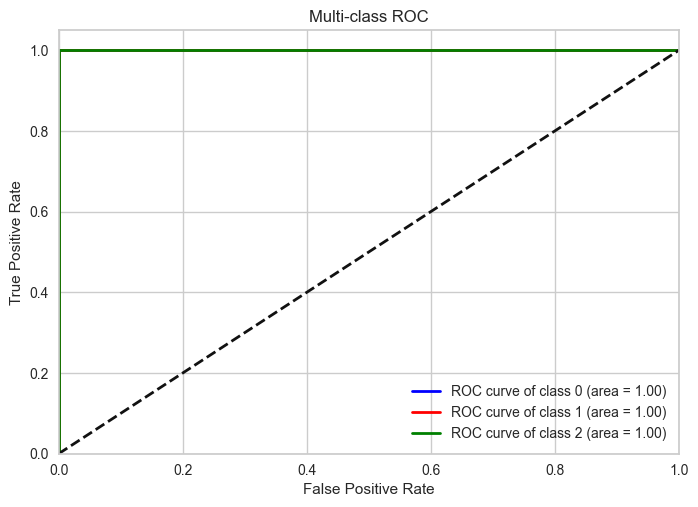

In [73]:
model.fit(X_train, y_train)

# Converting the target variable to binary format
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Getting the prediction probabilities
y_pred_proba = model.predict_proba(X_test)

# Calculating ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [80]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__island', 'ordinalencoder__sex',
       'remainder__culmen_length_mm', 'remainder__culmen_depth_mm',
       'remainder__flipper_length_mm', 'remainder__body_mass_g'],
      dtype=object)

In [82]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

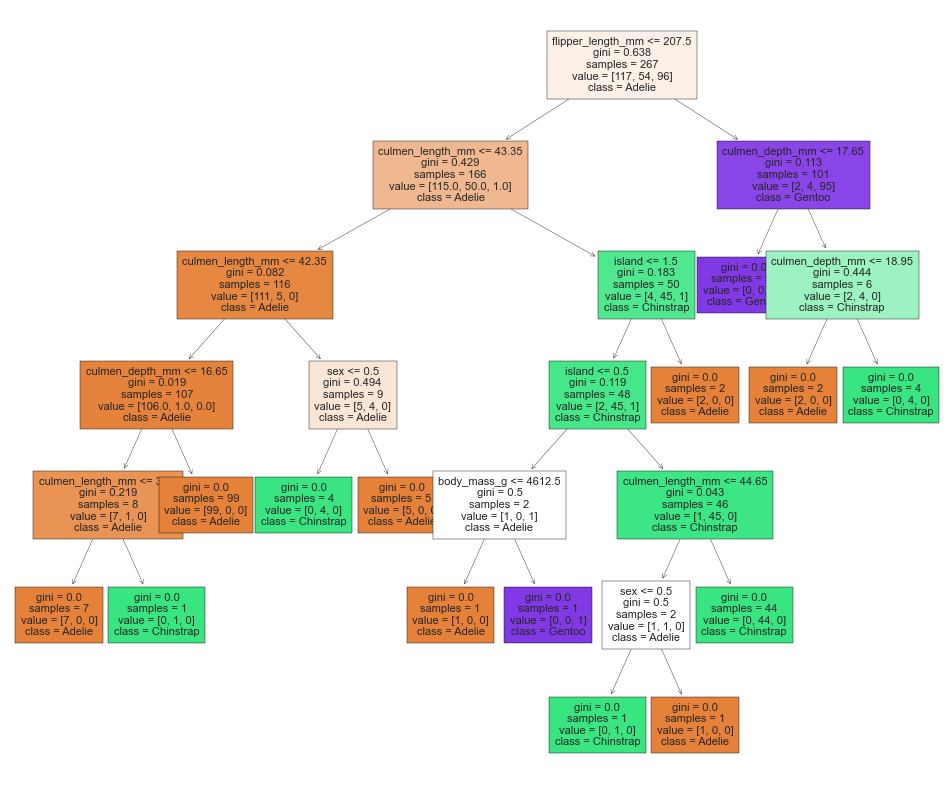

In [84]:
plt.figure(figsize=(12, 10), dpi=100)

plot_tree(pipe_model["DT_model"],
          filled=True,
          feature_names=new_features,
          class_names=y.unique().tolist(),
          fontsize=8);

## <font color='skyblue'> <b>GridSearchCV</b><font color='black'>  

In [90]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", 2, 3, 5],
              "DT_model__max_depth": [None, 2, 3, 4],
              "DT_model__min_samples_leaf": [1, 2, 3, 5],
              "DT_model__min_samples_split": [2, 3, 5, 7]}

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['island', 'sex'], dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [None, 2, 3, 4],
                         'DT_model__max_features': [None, 'auto', 'log2', 2, 3,
                                                    5],
                         'DT_model__min_samples_leaf': [1, 2, 3, 5],
                         'DT_model__min_samples_split': [2, 3, 5, 7],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='f1_micro')

In [92]:
grid_model.best_params_

{'DT_model__max_depth': None,
 'DT_model__max_features': None,
 'DT_model__min_samples_leaf': 2,
 'DT_model__min_samples_split': 7,
 'DT_model__splitter': 'random'}

In [94]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=7,
                                        random_state=101, splitter='random'))])

# <font color='steelblue'> <b>Final Model & Prediction</b><font color='black'>  

## <font color='skyblue'> <b>Final Model</b><font color='black'>  

In [99]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model",
               DecisionTreeClassifier(min_samples_leaf=2,
                                      min_samples_split=7,
                                      random_state=101,
                                      splitter='random'))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=7,
                                        random_state=101, splitter='random'))])

## <font color='skyblue'> <b>Prediction</b><font color='black'>  

In [102]:
samples = {"island": ["Torgersen", "Biscoe"],
           "culmen_depth_mm":[18,14],
           "culmen_length_mm": [39, 48],
           'flipper_length_mm':[180, 214],
           "sex":["MALE","FEMALE"],
           'body_mass_g': [3700,4900]
           }

df_samples = pd.DataFrame(samples)
df_samples

,island,culmen_depth_mm,culmen_length_mm,flipper_length_mm,sex,body_mass_g
0,Torgersen,18,39,180,MALE,3700
1,Biscoe,14,48,214,FEMALE,4900


In [104]:
prediction = final_model.predict(df_samples)
prediction

array(['Adelie', 'Gentoo'], dtype=object)

<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:40px 20px;"><b>THANK YOU!</b></p>